<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Python_QuantumComputing/blob/main/Aula_7_Superdense_Coding_Safe_Quantum_communication_protocol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit qiskit-aer pylatexenc qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=745948ae0dc07a1d88c1a757d9f993fa332c46100164fc631941f944620ac8d2
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178

Importacao dos pacotes

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2
from qiskit_aer import AerSimulator

Criacao do circuito

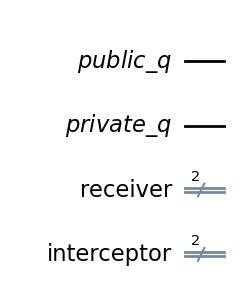

In [54]:
private_qubit = QuantumRegister(1, 'private_q')
public_qubit = QuantumRegister(1, 'public_q')
receiver_bits = ClassicalRegister(2, 'receiver')
interceptor_bits = ClassicalRegister(2, 'interceptor')
qc = QuantumCircuit(public_qubit, private_qubit, receiver_bits, interceptor_bits)
qc.draw('mpl')



##Inicialização dos qubits (Bob)

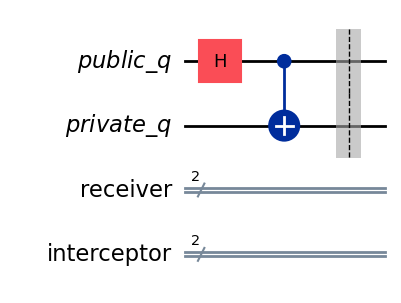

In [55]:
qc.h(public_qubit[0])
qc.cx(public_qubit[0], private_qubit[0])
qc.barrier()
qc.draw('mpl')

##Codificação da mensagem (Alice)

Insira um par de bits para enviar: 11


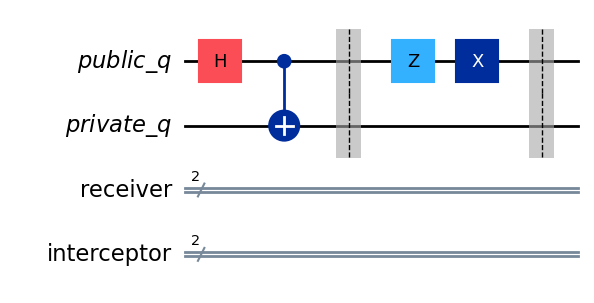

In [56]:
mensagem = input('Insira um par de bits para enviar: ')
rodou = 0
if mensagem == '00':
  pass
if mensagem == '01':
  qc.z(public_qubit[0])
if mensagem == '10':
  qc.x(public_qubit[0])
if mensagem == '11':
  qc.z(public_qubit[0])
  qc.x(public_qubit[0])
else:
  print('Mensagem inválida')
qc.barrier()
qc.draw('mpl')

##Interceptação (Eve) - Para ver como funciona sem a interceptação, pular esta parte inicialmente

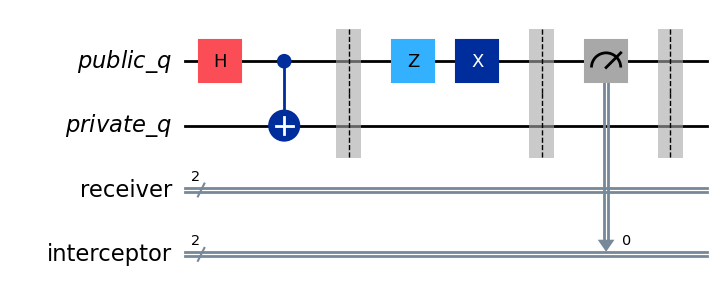

In [50]:
qc.measure(public_qubit[0], interceptor_bits[0])
rodou = 1
qc.barrier()
qc.draw('mpl')

##Decodificação da mensagem feita pelo (Bob)

In [57]:
qc.cx(public_qubit[0], private_qubit[0])
qc.h(public_qubit[0])


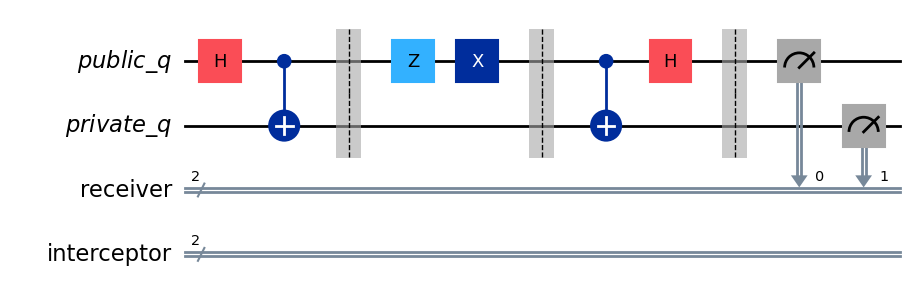

In [58]:
qc.barrier()
qc.measure([public_qubit[0], private_qubit[0]], receiver_bits)
qc.draw('mpl')

##Execução

In [59]:
sampler = SamplerV2(AerSimulator())
result = sampler.run((qc,), shots=1000).result()
data = result[0].data
print('Receptor:', data.receiver.get_counts())
if rodou == 1:
    print('Interceptador:', data.interceptor.get_counts())


Receptor: {'11': 1000}
